In [15]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [19]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

X, y = mnist[:, 1:], mnist[:, :1]

ohe = OneHotEncoder(categories="auto")

y_hot = ohe.fit_transform(y).todense()

In [46]:
in_encod = Input(shape=(784,))
d_en_1 = Dense(200, activation="relu")(in_encod)
d_en_2 = Dense(100, activation="relu")(d_en_1)
out_encod = Dense(50, activation="relu")(d_en_2)

In [47]:
encoder = Model(in_encod, out_encod)

In [48]:
in_decod = Input(shape=(50,))
d_de_1 = Dense(100, activation="relu")(in_decod)
d_de_2 = Dense(200, activation="relu")(d_de_1)
out_decod = Dense(784, activation="sigmoid")(d_de_2)

In [49]:
decoder = Model(in_decod, out_decod)

In [50]:
in_auto = Input(shape=(784,))
enc_layer = encoder(in_auto)
dec_layer = decoder(enc_layer)

In [51]:
autoencoder = Model(in_auto, dec_layer)

In [52]:
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
model_7 (Model)              (None, 50)                182150    
_________________________________________________________________
model_8 (Model)              (None, 784)               182884    
Total params: 365,034
Trainable params: 365,034
Non-trainable params: 0
_________________________________________________________________


In [53]:
X_mod = X / 255

In [62]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_mod, y, test_size=0.33, random_state=42)

In [64]:
hist = autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 13400 samples, validate on 6600 samples
Epoch 1/100
13400/13400 [==============================] - 1s 86us/sample - loss: 0.3482 - val_loss: 0.2581
Epoch 2/100
13400/13400 [==============================] - 1s 52us/sample - loss: 0.2375 - val_loss: 0.2078
Epoch 3/100
13400/13400 [==============================] - 1s 62us/sample - loss: 0.1906 - val_loss: 0.1774
Epoch 4/100
13400/13400 [==============================] - 1s 58us/sample - loss: 0.1690 - val_loss: 0.1590
Epoch 5/100
13400/13400 [==============================] - 1s 71us/sample - loss: 0.1535 - val_loss: 0.1471
Epoch 6/100
13400/13400 [==============================] - 1s 51us/sample - loss: 0.1434 - val_loss: 0.1389
Epoch 7/100
13400/13400 [==============================] - 1s 52us/sample - loss: 0.1360 - val_loss: 0.1331
Epoch 8/100
13400/13400 [==============================] - 1s 55us/sample - loss: 0.1300 - val_loss: 0.1275
Epoch 9/100
13400/13400 [==============================] - 1s 63us/sample - loss: 0.124

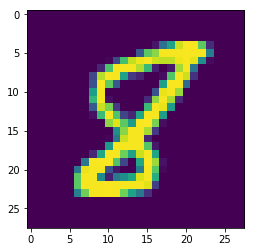

In [65]:
plt.imshow(X_train[3].reshape(28, 28))

In [66]:
out = autoencoder.predict(np.array([X_train[3]]))

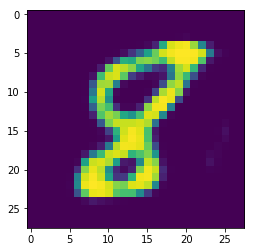

In [67]:
plt.imshow(out[0].reshape(28, 28))